# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Resha Mahardhika Saputra]
- **Email:** [112202106604@mhs.dinus.ac.id]
- **ID Dicoding:** [reshasapt]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren waktu rental sepeda ini tiap jamnya?
- Bagaimana perbedaan rental sepeda antara hari kerja dan hari libur?
- Kapan waktu musim dengan tingkat peminjaman sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengambil/load data bike sharing count dalam daily basis

In [5]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengambil/load data bike sharing count dalam hourly basis

In [6]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai data day_df**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada data daily basis / day_df ini tidak ada missing value. Namun date /dteday masih bertipe object

In [113]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi pada day_df

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai data hour_df**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada data hourly basis / hour_ ini tidak terdapat missing value. Namun date/dteday masih bertipe object

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengubah dteday dari object menjadi datetime dengan function to_datetime

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Melihat jumlah total rental bike berdasarkan jam nya

In [163]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean"]
})

cnt                
    max min        mean
hr                     
0   283   2   53.898072
1   168   1   33.375691
2   132   1   22.869930
3    79   1   11.727403
4    28   1    6.352941
5    66   1   19.889819
6   213   1   76.044138
7   596   1  212.064649
8   839   5  359.011004
9   426  14  219.309491
10  539   8  173.668501
11  663  10  208.143054
12  776   3  253.315934
13  760  11  253.661180
14  750  12  240.949246
15  750   7  251.233196
16  783  11  311.983562
17  976  15  461.452055
18  977  23  425.510989
19  743  11  311.523352
20  567  11  226.030220
21  584   6  172.314560
22  502   9  131.335165
23  256   2   87.831044

In [18]:
hour_df.groupby(by="hr").cnt.mean().sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

Ditemukan bahwa untuk jam **16-19** merupakan jam sibuk dimana rata-rata rental bike mencapai titik tertinggi

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melakukan eksplorasi berdasarkan hari kerja atau tidak

In [169]:
day_df.groupby(by="workingday").cnt.mean().sort_values(ascending=False)

workingday
1    4584.820000
0    4330.168831
Name: cnt, dtype: float64

In [170]:
day_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean"]
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Melakukan eksplorasi data berdasarkan jumlah total rata-rata rental tiap musim

In [20]:
day_df.groupby(by="season").cnt.mean().sort_values(ascending=False)

season
3    5644.303191
2    4992.331522
4    4728.162921
1    2604.132597
Name: cnt, dtype: float64

Mengubah label 1-4 Menjadi nama tiap musim

In [21]:
season_df = day_df.groupby(by="season").cnt.mean().sort_values(ascending=False).reset_index()
season_df["season"] = season_df["season"].apply(lambda x : 'Musim Semi' if x == 1 else ('Musim Panas'if x == 2 else ('Musim Gugur'if x == 3 else 'Musim Salju' )))
season_df.head()

,season,cnt
0,Musim Gugur,5644.303191
1,Musim Panas,4992.331522
2,Musim Salju,4728.162921
3,Musim Semi,2604.132597


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren waktu rental sepeda ini tiap jamnya?

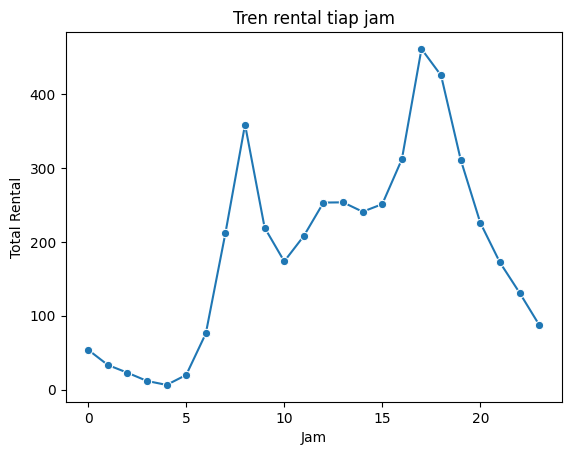

In [22]:
sns.lineplot(data=hour_df, x='hr', y='cnt', marker='o', errorbar=None )
plt.title('Tren rental tiap jam')
plt.xlabel('Jam')
plt.ylabel('Total Rental')

plt.show()

### Pertanyaan 2: Bagaimana perbedaan rental sepeda antara hari kerja dan hari libur?

In [23]:
df_counts = day_df.groupby(by="workingday").cnt.mean().sort_values(ascending=False).reset_index()
df_counts["workingday"] = df_counts["workingday"].apply(lambda x : 'Hari Libur' if x == 1 else 'Hari Kerja' )
df_counts.head()

,workingday,cnt
0,Hari Libur,4584.820000
1,Hari Kerja,4330.168831


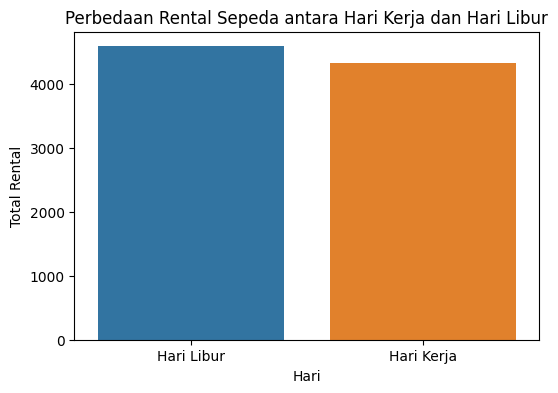

In [24]:
plt.figure(figsize=(6, 4))

sns.barplot(data=df_counts, x=df_counts['workingday'], y=df_counts['cnt'], hue="workingday", errorbar=None)
plt.title('Perbedaan Rental Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Total Rental')
plt.show()


### Pertanyaan 3: Kapan waktu musim dengan tingkat peminjaman sepeda tertinggi?

In [25]:
day_df.groupby(by="season").cnt.mean().sort_values(ascending=False)

season
3    5644.303191
2    4992.331522
4    4728.162921
1    2604.132597
Name: cnt, dtype: float64

In [26]:
season_df = day_df.groupby(by="season").cnt.mean().sort_values(ascending=False).reset_index()
season_df["season"] = season_df["season"].apply(lambda x : 'Musim Semi' if x == 1 else ('Musim Panas'if x == 2 else ('Musim Gugur'if x == 3 else 'Musim Dingin' )))
season_df.head()

,season,cnt
0,Musim Gugur,5644.303191
1,Musim Panas,4992.331522
2,Musim Dingin,4728.162921
3,Musim Semi,2604.132597


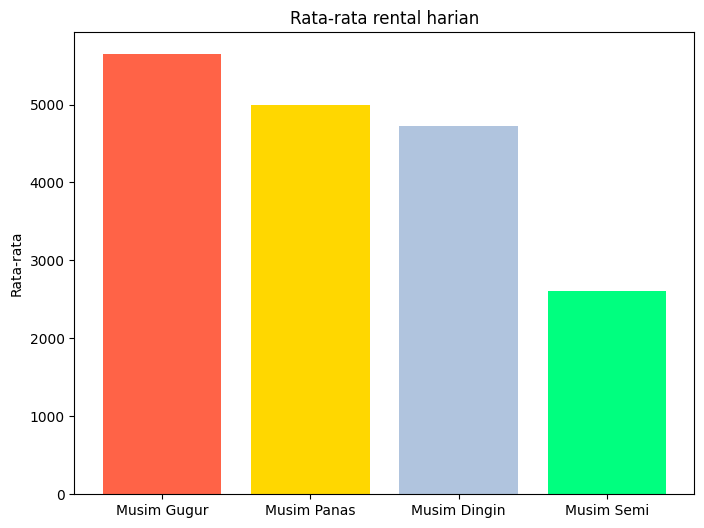

In [27]:
plt.figure(figsize=(8, 6))
plt.bar(season_df['season'], season_df['cnt'], color=['tomato', 'gold', 'lightsteelblue', 'springgreen'])
plt.ylabel('Rata-rata')
plt.title('Rata-rata rental harian')
plt.show()

## Conclusion

- **Conclusion pertanyaan 1**: Tren rental sepeda, mencapai puncaknya pada jam **4-7 Sore** dan **8 Pagi** yang berbanding lurus dengan jam sibuk untuk orang kerja maupun anak sekolah. Pada jam-jam seperti ini diharapkan kebutuhan stok akan Bike-sharing ini dapat terpenuhi dengan baik, juga dapat memberikan penawaran khusus/ promo untuk membership di jam-jam puncak untuk mendorong lebih banyak membership.

- **Conclusion pertanyaan 2** : Dari hasil analisis, ditemukan bahwa permintaan penyewaan sepeda relatif konsisten antara hari kerja dengan hari libur. Meski pada hari kerja terdapat **sedikit peningkatan**, namun perbedaan yang ada tidak terlalu signifikan. Oleh karena hal itu strategi yang dapat dilakukan adalah upaya memberikan penawaran spesial khusus hari libur untuk tujuan rekreasi agar dapat menjangkau lebih banyak member rental sepeda.

- **Conclusion pertanyaan 3** : Musim yang memiliki total rata-rata peminjaman tertinggi adalah **musim Gugur**, diikuti musim panas dan musim dingin. Untuk musim Gugur, Panas dan Dingin perbeaan yang ada tidak terlalu signifikan. Sementara pada musim semi menunjukkan tingkat rental yang paling rendah diantara keempat musim yang ada.